In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from scipy.signal import savgol_filter
import seaborn as sn
import pandas as pd

In [2]:
repstr = '0'
df0 = pickle.load( open('dataDump'+repstr+'.pickle','rb' ) )
repstr = '1'
df1 = pickle.load( open('dataDump'+repstr+'.pickle','rb' ) )
repstr = '2'
df2 = pickle.load( open('dataDump'+repstr+'.pickle','rb' ) )
repstr = '01'
df01 = pickle.load( open('dataDump'+repstr+'.pickle','rb' ) )
repstr = '02'
df02 = pickle.load( open('dataDump'+repstr+'.pickle','rb' ) )
repstr = '12'
df12 = pickle.load( open('dataDump'+repstr+'.pickle','rb' ) )
repstr = '012'
df012 = pickle.load( open('dataDump'+repstr+'.pickle','rb' ) )

ntimepts = df012['ntimepts']
ntimeptsModel = df012['ntimeptsModel']
tspan = np.linspace(0,110,12) # 110 is the last sampling time in our experiment



### Training error

In [3]:
def nstep_pred(X,A,ntimepts,ntraj):
    Xpred = np.zeros((A.shape[0],ntimepts*ntraj)) 
    count = 0
    for i in range(0,ntraj):
        x_test_ic = X[:,i*(ntimepts):i*(ntimepts)+1]
        for j in range(0,ntimepts):
            Xpred[:,count:count+1] = np.dot(np.linalg.matrix_power(A,j),x_test_ic) 
            count += 1
    feature_means = np.mean(X,axis=1).reshape(len(X),1)
    cd = 1 - ((np.linalg.norm(X - Xpred,ord=2)**2)/(np.linalg.norm(X - feature_means,ord=2)**2))   # coeff of determination aka R^2 
    print(f'Coefficient of determination for n-step prediction is {cd:.3e}')
    return Xpred

def onestep_pred(X,A,ntimepts,ntraj):
    Xpred = np.zeros((A.shape[0],ntimepts*ntraj)) 
    for i in range(0,ntraj):
        Xpred[:,i*ntimepts:i*ntimepts+1] = X[:,i*ntimepts:i*ntimepts+1]
        Xpred[:,i*ntimepts+1:i*ntimepts+ntimepts] = A @ X[:,i*ntimepts:i*ntimepts+ntimepts-1]
    feature_means = np.mean(X,axis=1).reshape(len(X),1)
    cd = 1 - ((np.linalg.norm(X - Xpred,ord=2)**2)/(np.linalg.norm(X - feature_means,ord=2)**2))   # coeff of determination aka R^2 
    print(f'Coefficient of determination for one-step prediction is {cd:.3e}')
    return Xpred
    

def pred_sbplts(X,Y,nrows,ncols,figtitle,figuresize=(10,7)):
    varidx = np.random.randint(0,X.shape[0],nrows*ncols)
    fig, ax = plt.subplots(nrows, ncols, figsize=figuresize)
    plt.suptitle(figtitle)
    idx = 0
    for row in range(0,nrows):
        for col in range(0,ncols):
            ax[row,col].plot(X[varidx[idx],:],'o--',ms=8,lw=2,color='tab:blue');
            ax[row,col].plot(Y[varidx[idx],:],'s--',ms=4,lw=1,color='tab:orange');
            ax[row,col].grid()
            ax[row,col].spines['right'].set_visible(False)
            ax[row,col].spines['top'].set_visible(False)
            idx += 1 


In [4]:
A0 = df0['A']
X0 = df0['X']
nreps = len(df0['reps'])
Xpred0 = nstep_pred(X0,A0,ntimeptsModel,nreps)

A1 = df1['A']
X1 = df1['X']
nreps = len(df1['reps'])
Xpred1 = nstep_pred(X1,A1,ntimeptsModel,nreps)

A2 = df2['A']
X2 = df2['X']
nreps = len(df2['reps'])
Xpred2 = nstep_pred(X2,A2,ntimeptsModel,nreps)


Coefficient of determination for n-step prediction is 1.000e+00
Coefficient of determination for n-step prediction is 1.000e+00
Coefficient of determination for n-step prediction is 1.000e+00


In [5]:
# use replicates 01 to predict replicates 01
A01 = df01['A']
X01 = df01['X']
nreps = len(df01['reps'])
Xpred01 = nstep_pred(X01,A01,ntimeptsModel,nreps)

Coefficient of determination for n-step prediction is 1.000e+00


In [6]:
# Use replicates 12 to predict replicates 12
A12 = df12['A']
X12 = df12['X']
nreps = len(df12['reps'])
Xpred12 = nstep_pred(X12,A12,ntimeptsModel,nreps)


Coefficient of determination for n-step prediction is 1.000e+00


In [7]:
# Use replicates 02 to predict replicates 02
A02 = df02['A']
X02 = df02['X']
nreps = len(df02['reps'])
Xpred02 = nstep_pred(X02,A02,ntimeptsModel,nreps)


Coefficient of determination for n-step prediction is 1.000e+00


In [8]:
# Use replicates 012 to predict replicates 012
A012 = df012['A']
X012 = df012['X']
nreps = len(df012['reps'])
Xpred012 = nstep_pred(X012,A012,ntimeptsModel,nreps)


Coefficient of determination for n-step prediction is 1.000e+00


### Comparing sensor genes identified by models trained on all combinations of replicates (trajectories)

In [32]:
sg0 = set(df0['idx_maxEnergy']) # sensor genes from replicate 0
sg1 = set(df1['idx_maxEnergy'])
sg2 = set(df2['idx_maxEnergy'])
sg01 = set(df01['idx_maxEnergy'])
sg02 = set(df02['idx_maxEnergy'])
sg12 = set(df12['idx_maxEnergy'])
sg012 = set(df012['idx_maxEnergy'])


In [33]:
# get intersections of sg012 with the rest of the sets
sg012isg0 = (sg012 & sg0)
sg012isg1 = (sg012 & sg1)
sg012isg2 = (sg012 & sg2)
sg012isg01 = (sg012 & sg01)
sg012isg02 = (sg012 & sg02)
sg012isg12 = (sg012 & sg12)
sg012iall = (sg012 & sg01 & sg02 & sg12 )

# get number of genes which are unique to that set among all sets
sg0_unique = sg0 - sg1 - sg2 - sg01 - sg02 - sg12 - sg012
sg1_unique = sg1 - sg0 - sg2 - sg01 - sg02 - sg12 - sg012
sg2_unique = sg2 - sg1 - sg0 - sg01 - sg02 - sg12 - sg012
sg01_unique = sg01 - sg1 - sg2 - sg0 - sg02 - sg12 - sg012
sg02_unique = sg02 - sg1 - sg2 - sg01 - sg0 - sg12 - sg012
sg12_unique = sg12 - sg1 - sg2 - sg01 - sg02 - sg0 - sg012
sg012_unique = sg012 - sg1 - sg2 - sg01 - sg02 - sg12 - sg0


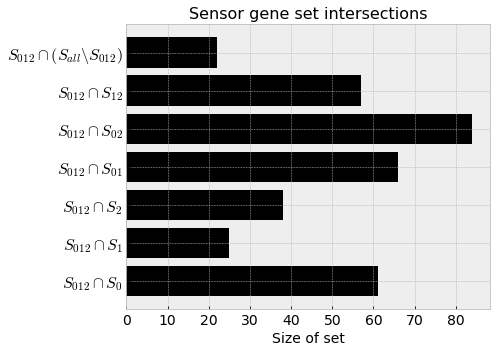

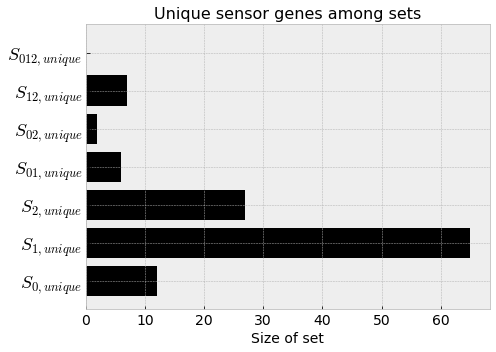

In [34]:
# plots intersections




lenofints = [len(list(sg012isg0)),len(list(sg012isg1)),len(list(sg012isg2)), \
             len(list(sg012isg01)),len(list(sg012isg02)),len(list(sg012isg12)), \
             len(list(sg012iall))]
x_pos = [i for i, _ in enumerate(lenofints)]
plt.style.use('bmh')
plt.rcParams.update({'figure.autolayout':True})
plt.figure(figsize=(7,5))
plt.barh(x_pos, lenofints, color='black');
plt.title("Sensor gene set intersections",fontsize=16);
plt.xlabel("Size of set",fontsize=14);
yticksstr = [r'$S_{012}\cap S_0$',r'$S_{012}\cap S_1$',r'$S_{012}\cap S_2$', \
             r'$S_{012}\cap S_{01}$',r'$S_{012}\cap S_{02}$',r'$S_{012}\cap S_{12}$', \
             r'$S_{012}\cap (S_{all} \backslash S_{012})$']
plt.yticks(x_pos, yticksstr,fontsize=16);
plt.xticks(fontsize=14);
plt.savefig('figures/setintersections.pdf',dpi=600)

# plot uniques
lenofuniques = [len(list(sg0_unique)),len(list(sg1_unique)),len(list(sg2_unique)), \
             len(list(sg01_unique)),len(list(sg02_unique)),len(list(sg12_unique)), \
             len(list(sg012_unique))]
x_pos = [i for i, _ in enumerate(lenofuniques)]
plt.style.use('bmh')
plt.rcParams.update({'figure.autolayout':True})
plt.figure(figsize=(7,5));
plt.barh(x_pos, lenofuniques, color='black');
plt.title("Unique sensor genes among sets",fontsize=16);
plt.xlabel("Size of set",fontsize=14);
yticksstr = [r'$S_{0,unique}$',r'$S_{1,unique}$',r'$S_{2,unique}$', \
             r'$S_{01,unique}$',r'$S_{02,unique}$',r'$S_{12,unique}$', \
             r'$S_{012,unique}$']
plt.yticks(x_pos, yticksstr,fontsize=18);
plt.xticks(fontsize=14);
plt.savefig('figures/uniquesets.pdf',dpi=600)



### Various plots of time traces of genes 

In [ ]:
def plot_means_opt_sensor_genes(names,idx,mean,stdev,nrows=2,ncols=2):
    plt.rcParams.update({'font.size': 12})
    f, ax = plt.subplots(nrows, ncols, figsize=(20, 20))
    c = 0
    ymin = mean[idx].min()-0.1
    ymax = mean[idx].max()+0.1
    for row in range(0,nrows):
        for col in range(0,ncols):
            ax[row,col].title.set_text(names[c])
            ax[row,col].errorbar(tspan,mean[idx[c],:],\
                        yerr=df['stdev_bs'][idx[c],:],\
                        fmt='D--',c='tab:green',ms=10,ecolor='tab:green',capsize=7);
            ax[row,col].spines['right'].set_visible(False)
            ax[row,col].spines['top'].set_visible(False)
            ax[row,col].set_ylim([ymin,ymax])
            c += 1
            
def plots_opt_sensor_genes(names,idx,mean_c,stdev_c,mean_bs,stdev_bs,X,Xpred,Xc,Xt,ntimeptsModel):
    gene_to_plot = idx[np.random.randint(0,len(idx))]
    print(gene_to_plot, names[gene_to_plot])

    nrows = 1
    ncols = 3
    fig, ax = plt.subplots(nrows, ncols, figsize=(15, 3));
    ax[0].errorbar(tspan,mean_c[gene_to_plot,:],yerr=stdev_c[gene_to_plot,:],fmt='s--',ms=10,ecolor='tab:blue',capsize=7);
    ax[0].errorbar(tspan,mean_t[gene_to_plot,:],yerr=stdev_t[gene_to_plot,:],fmt='o--',ms=10,ecolor='tab:orange',capsize=7);
    ax[1].errorbar(tspan[:],mean_bs[gene_to_plot,:],yerr=stdev_bs[gene_to_plot,:],fmt='d--',c='tab:green',ms=10,ecolor='tab:green',capsize=7);
    for i in range(0,nreps):
        ax[2].plot(tspan[2:],Xc[gene_to_plot,i*(ntimeptsModel):i*(ntimeptsModel)+(ntimeptsModel)],'s--',ms=10,color='tab:blue');
        ax[2].plot(tspan[2:],Xt[gene_to_plot,i*(ntimeptsModel):i*(ntimeptsModel)+(ntimeptsModel)],'o--',ms=10,color='tab:orange');    
    for i in range(0,ncols):
        ax[i].spines['right'].set_visible(False)
        ax[i].spines['top'].set_visible(False)
    ax[0].title.set_text('mean of the groups')
    ax[1].title.set_text('mean of the background subtracted data')
    ax[2].title.set_text('all trajectories of the groups')

    nrows = 1
    ncols = nreps
    fig, ax = plt.subplots(nrows, ncols, figsize=(15, 3));
    ymin = np.minimum(Xc[gene_to_plot].min(),Xt[gene_to_plot].min())-0.1
    ymax = np.maximum(Xc[gene_to_plot].max(),Xt[gene_to_plot].max())+0.1
    for i in range(0,nreps):
        ax[i].set_title('Replicate'+str(i+1))
        ax[i].plot(tspan[2:],Xc[gene_to_plot,i*(ntimeptsModel):i*(ntimeptsModel)+(ntimeptsModel)],'s--',ms=10,color='tab:blue');
        ax[i].plot(tspan[2:],Xt[gene_to_plot,i*(ntimeptsModel):i*(ntimeptsModel)+(ntimeptsModel)],'o--',ms=10,color='tab:orange');    
#         ax[i].plot(tspan[2:],X[gene_to_plot,i*(ntimeptsModel):i*(ntimeptsModel)+(ntimeptsModel)],'D--',ms=10,color='tab:green');    
        ax[i].set_ylim([ymin,ymax])
    
    nrows = 1
    ncols = nreps
    fig, ax = plt.subplots(nrows, ncols, figsize=(15, 3));
    for i in range(0,nreps):
        ax[i].plot(savgol_filter(X[gene_to_plot,i*(ntimeptsModel):i*(ntimeptsModel)+(ntimeptsModel)],5,3),'D--',ms=10,color='tab:green');    
        ax[i].plot(savgol_filter(Xpred[gene_to_plot,i*(ntimeptsModel):i*(ntimeptsModel)+(ntimeptsModel)],5,3),'X--',ms=10,color='tab:red');    

In [ ]:
NROWS = 5
NCOLS = 5 # there are 25 selected sensor genes. 

In [ ]:
# plot means of background subtracted optimal sensor genes given by observability maximization using model

plot_means_opt_sensor_genes(maxEnergy_geneIDs,idx_maxEnergy,mean_bs,stdev_bs,nrows=NROWS,ncols=NCOLS)


In [ ]:
# various plots for optimal sensor genes given by observability maximization using model

plots_opt_sensor_genes(geneIDs,idx_maxEnergy,mean_c,stdev_c,mean_bs,stdev_bs,X,Xpred,Xc,Xt,ntimeptsModel)


In [ ]:
# plot means of background subtracted optimal sensor genes given by observability measures from differential data

plot_means_opt_sensor_genes(obs_diffdata_geneIDs,idx_maxobs_diffdata,mean_bs,stdev_bs,nrows=NROWS,ncols=NCOLS)


In [ ]:
# various plots for optimal sensor genes given by observability measure of differential data

plots_opt_sensor_genes(geneIDs,idx_maxobs_diffdata,mean_c,stdev_c,mean_bs,stdev_bs,X,Xpred,Xc,Xt,ntimeptsModel)

In [ ]:
# plot means of background subtracted optimal sensor genes given by observability measures from treatment and control

plot_means_opt_sensor_genes(obs_data_geneIDs,idx_maxobs_data,mean_bs,stdev_bs,nrows=NROWS,ncols=NCOLS)

In [ ]:
# various plots for optimal sensor genes given by observability measure of treatment and control data

plots_opt_sensor_genes(geneIDs,idx_maxobs_data,mean_c,stdev_c,mean_bs,stdev_bs,X,Xpred,Xc,Xt,ntimeptsModel)